# Loading libraries and setting up

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import scipy

# PCA Plotting

Defining the column names:

In [2]:
names = ["Individual", "PC1", "PC2", "PC3", "PC4", "Population"]

Loading the eigenVec file from the pca run

## West-Eurasian PCA

In [3]:
pcaDat = pd.read_csv("/data/pca/results/pca.WestEurasia.evec",
                     delim_whitespace=True, skiprows=1, names=names)

Looking at the data, we find that it is a matrix, with each individual on one row, and the columns denoting the first 10 principal components. The last column contains the population for each individual:

In [4]:
pcaDat

,Individual,PC1,PC2,PC3,PC4,Population
0,Yuk_009,0.0123,0.1252,0.1147,0.0567,Yukagir
1,Yuk_025,0.0120,0.1258,0.1168,0.0576,Yukagir
2,Yuk_022,0.0136,0.1303,0.1186,0.0564,Yukagir
3,Yuk_020,0.0170,0.1278,0.1176,0.0584,Yukagir
4,MC_40,0.0183,0.1226,0.1123,0.0537,Chukchi
5,Yuk_024,0.0144,0.1271,0.1124,0.0584,Yukagir
6,Yuk_023,0.0124,0.1348,0.1238,0.0642,Yukagir
7,MC_16,0.0144,0.1266,0.1169,0.0541,Chukchi
8,MC_15,0.0146,0.1250,0.1119,0.0559,Chukchi
9,MC_18,0.0175,0.1238,0.1167,0.0523,Chukchi


We can quickly plot the first two PCs for all individuals:

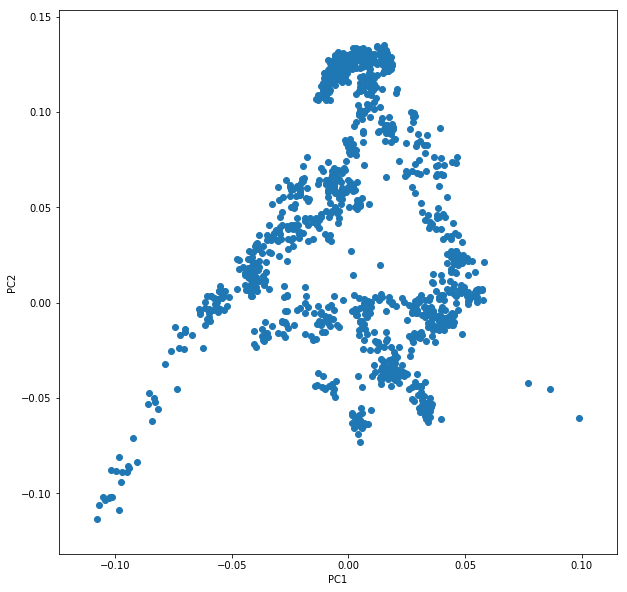

In [5]:
plt.figure(figsize=(10, 10))
plt.scatter(x=pcaDat["PC1"], y=pcaDat["PC2"])
plt.xlabel("PC1");
plt.ylabel("PC2");

which is not very helpful, because we can't see where each population falls. We can highlight a few populations to get a bit more of a feeling:

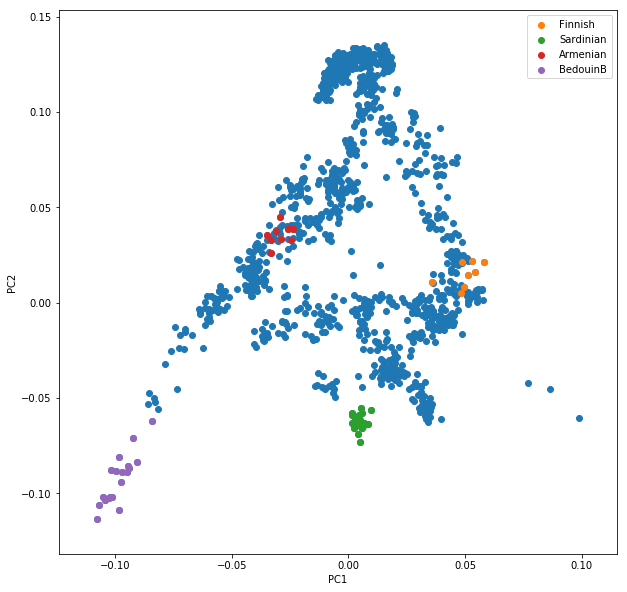

In [6]:
plt.figure(figsize=(10, 10))
plt.scatter(x=pcaDat["PC1"], y=pcaDat["PC2"], label="")
for pop in ["Finnish", "Sardinian", "Armenian", "BedouinB"]:
    d = pcaDat[pcaDat["Population"] == pop]
    plt.scatter(x=d["PC1"], y=d["PC2"], label=pop)
plt.legend()
plt.xlabel("PC1");
plt.ylabel("PC2");

We can improve the plot further by plotting only the population that we had in the population list. So we need to load the population list and while we're at it, also add color- and symbol numbers for plotting.

In [7]:
popListDat = pd.read_csv("/data/pca/WestEurasia.poplist.txt",
                         names=["Population"]).sort_values(by="Population")
nPops = len(popListDat)
nCols = 8
nSymbols = int(nPops / nCols)
colorIndices = [int(i / nSymbols) for i in range(nPops)]
symbolIndices = [i % nSymbols for i in range(nPops)]
popListDat = popListDat.assign(colorIndex=colorIndices, symbolIndex=symbolIndices)
popListDat

,Population,colorIndex,symbolIndex
1,Abkhasian,0,0
2,Adygei,0,1
3,Albanian,0,2
4,Armenian,0,3
5,Assyrian,0,4
6,Balkar,0,5
7,Basque,0,6
8,BedouinA,0,7
9,BedouinB,1,0
10,Belarusian,1,1


and we end up with only 720 points. Note that I'm here flipping the x axis to make the correlation to Geography more obvious. We can now plot all points with colors and symbols:

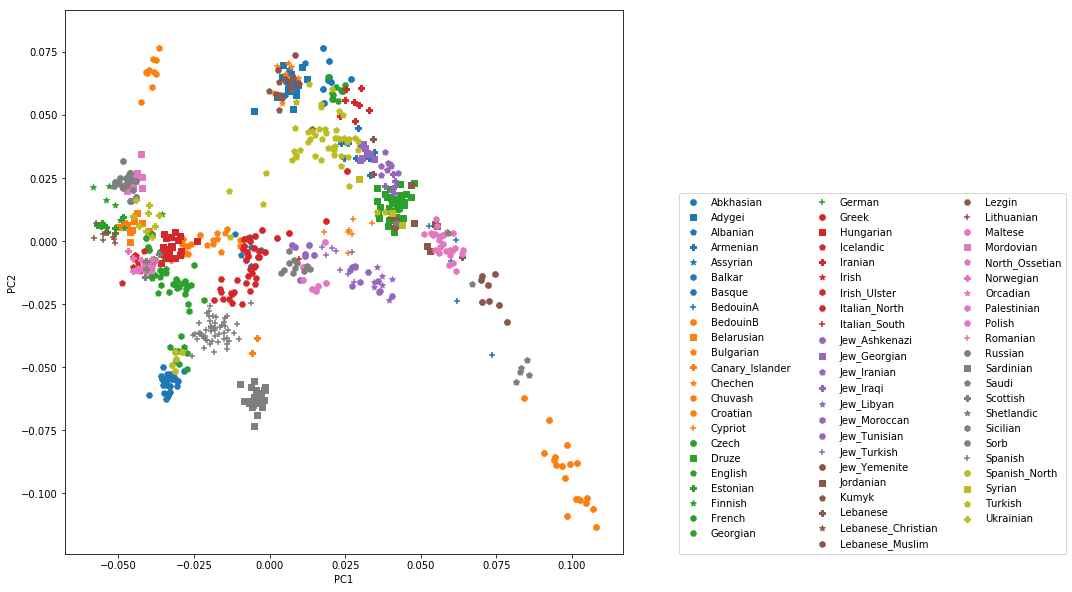

In [8]:
plt.figure(figsize=(10,10))
symbolVec = ["8", "s", "p", "P", "*", "h", "H", "+", "x", "X", "D", "d"]
colorVec = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd',
            u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']
for i, row in popListDat.iterrows():
    d = pcaDat[pcaDat.Population == row["Population"]]
    plt.scatter(x=-d["PC1"], y=d["PC2"], c=colorVec[row["colorIndex"]],
                marker=symbolVec[row["symbolIndex"]], label=row["Population"])
plt.xlabel("PC1");
plt.ylabel("PC2");
plt.legend(loc=(1.1, 0), ncol=3)

Adding ancient populations:

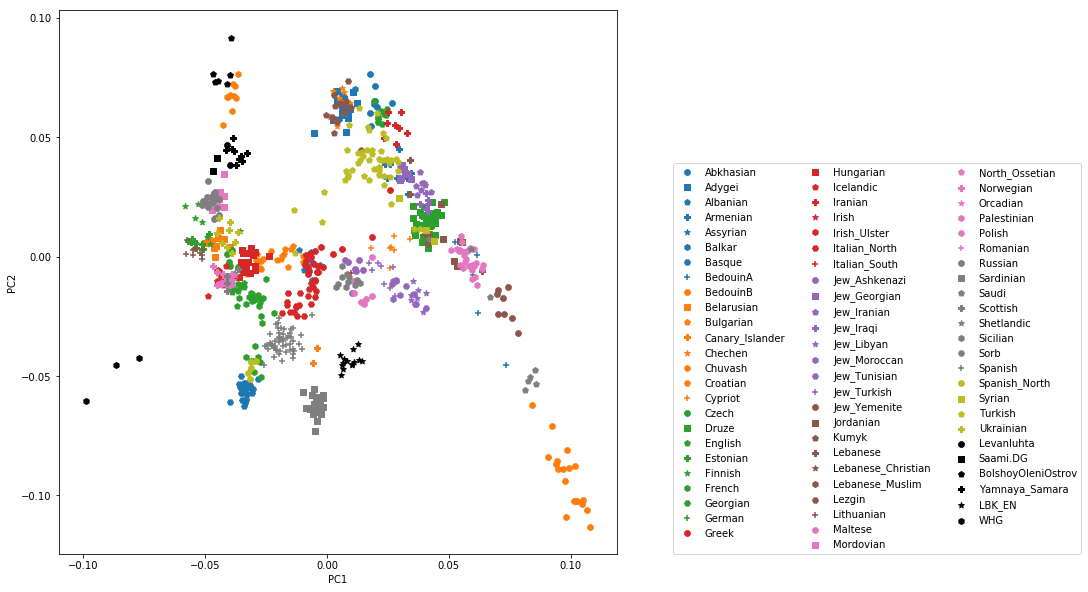

In [9]:
plt.figure(figsize=(10,10))
symbolVec = ["8", "s", "p", "P", "*", "h", "H", "+", "x", "X", "D", "d", "v", "<", ">", "^"]
colorVec = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd',
            u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']
for i, row in popListDat.iterrows():
    d = pcaDat[pcaDat.Population == row["Population"]]
    plt.scatter(x=-d["PC1"], y=d["PC2"], c=colorVec[row["colorIndex"]],
                marker=symbolVec[row["symbolIndex"]], label=row["Population"])

for i, pop in enumerate(["Levanluhta", "Saami.DG", "BolshoyOleniOstrov", "Yamnaya_Samara", "LBK_EN", "WHG"]):
    d = pcaDat[pcaDat.Population == pop]
    plt.scatter(x=-d["PC1"], y=d["PC2"], c="black", marker=symbolVec[i], label=pop)
plt.xlabel("PC1");
plt.ylabel("PC2");
plt.legend(loc=(1.1, 0), ncol=3)

## East-Eurasian PCA

In [44]:
popListDat = pd.read_csv("/data/pca/AllEurasia.poplist.txt",
                         names=["Population"]).sort_values(by="Population")
nPops = len(popListDat)
nCols = 9
nSymbols = int(nPops / nCols)
colorIndices = [int(i / nSymbols) for i in range(nPops)]
symbolIndices = [i % nSymbols for i in range(nPops)]
popListDat = popListDat.assign(colorIndex=colorIndices, symbolIndex=symbolIndices)
popListDat

,Population,colorIndex,symbolIndex
0,Abkhasian,0,0
1,Adygei,0,1
2,Albanian,0,2
3,Aleut,0,3
4,Aleut_Tlingit,0,4
5,Altaian,0,5
6,Ami,0,6
7,Armenian,0,7
8,Assyrian,0,8
9,Atayal,0,9


In [45]:
pcaDat = pd.read_csv("/data/pca/results/pca.AllEurasia.evec",
                     delim_whitespace=True, skiprows=1, names=names)

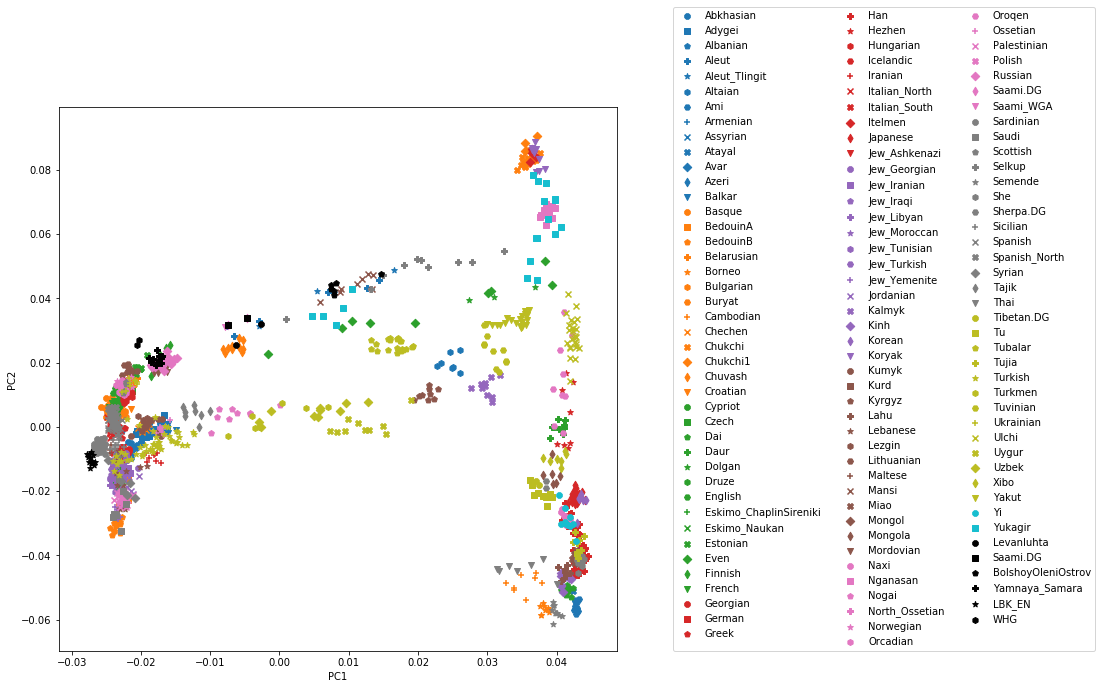

In [46]:
plt.figure(figsize=(10,10))
symbolVec = ["8", "s", "p", "P", "*", "h", "H", "+", "x", "X", "D", "d", "v", "<", ">", "^"]
colorVec = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd',
            u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']
for i, row in popListDat.iterrows():
    d = pcaDat[pcaDat.Population == row["Population"]]
    plt.scatter(x=-d["PC1"], y=d["PC2"], c=colorVec[row["colorIndex"]],
                marker=symbolVec[row["symbolIndex"]], label=row["Population"])

for i, pop in enumerate(["Levanluhta", "Saami.DG", "BolshoyOleniOstrov", "Yamnaya_Samara", "LBK_EN", "WHG"]):
    d = pcaDat[pcaDat.Population == pop]
    plt.scatter(x=-d["PC1"], y=d["PC2"], c="black", marker=symbolVec[i], label=pop)

plt.xlabel("PC1");
plt.ylabel("PC2");
plt.legend(loc=(1.1, 0), ncol=3)